<a href="https://colab.research.google.com/github/Sheyranna1/MachineLearning/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

import tensorflow as tf
import os
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
tf.config.list_physical_devices('GPU')

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[]

# 1.2 Remove weird images

In [2]:
# remove bad imgs
import cv2
import imghdr
from matplotlib import pyplot as plt

In [3]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/final project/data'

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
img = cv2.imread(os.path.join('data', 'good guy', 'Screenshot 2024-04-23 005906.png'))

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image /content/drive/MyDrive/Colab Notebooks/final project/data/evil spy/.ipynb_checkpoints


# 3 Load Data

In [7]:
import numpy as np
from matplotlib import pyplot as plt

#keras utility allows access big dataset for less comp power

#going to do preprocessing for me (check documentation for it if wanted)
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/final project/data')
tf.keras.utils.image_dataset_from_directory??

Found 398 files belonging to 3 classes.


In [ ]:
#access data from iterature which will give us batch back
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
len(batch) # 2 parts 1)images loaded into directory as array 2) labels!!!
#randomized
batch[0] #autoreshape so same size and batches them up

array([[[[109.61914  , 117.61914  , 128.       ],
         [109.393425 , 117.393425 , 128.       ],
         [108.46875  , 117.03348  , 128.       ],
         ...,
         [ 99.24414  , 162.27762  , 155.42801  ],
         [ 98.18639  , 161.56726  , 153.83818  ],
         [ 95.57031  , 158.95117  , 151.8086   ]],

        [[109.85742  , 117.85742  , 128.       ],
         [109.04521  , 117.04521  , 128.       ],
         [109.       , 117.78206  , 127.86995  ],
         ...,
         [121.25     , 183.41325  , 172.91016  ],
         [119.21484  , 183.07227  , 171.74942  ],
         [115.42578  , 179.2832   , 167.2832   ]],

        [[109.       , 117.       , 128.       ],
         [109.85661  , 117.85661  , 128.       ],
         [109.07948  , 117.07948  , 127.912704 ],
         ...,
         [137.96289  , 198.24219  , 186.22597  ],
         [136.11848  , 197.21451  , 186.02815  ],
         [135.75586  , 195.13867  , 184.04297  ]],

        ...,

        [[185.       , 185.       , 18

In [ ]:
# Using matplotlib to show data
#fig, ax = plt.subplots(ncols=5, figsize=(20,20))
#for idx, img in enumerate(batch[0][:5]):
    #ax[idx].imshow(img.astype(int))
    #ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
len(batch[0])

32

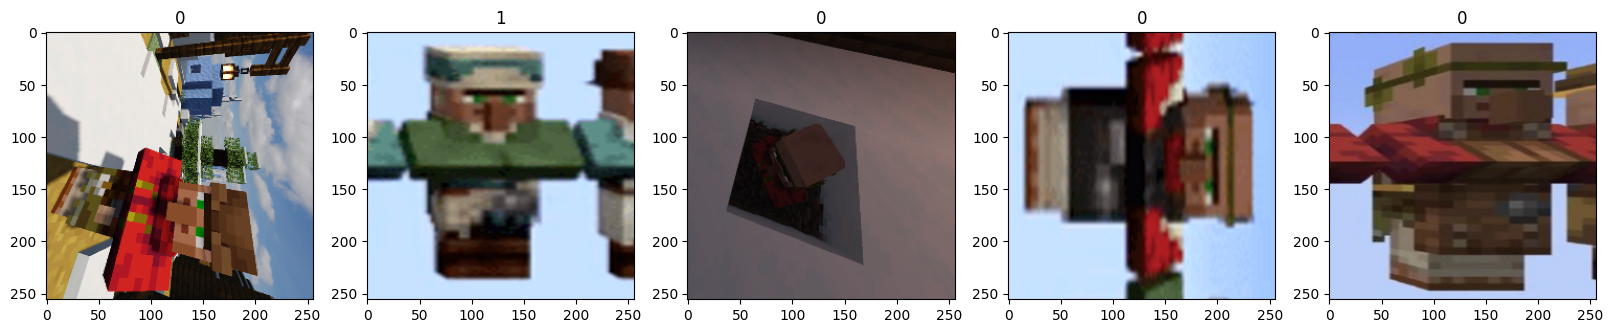

In [ ]:
# Using matplotlib to show data
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# 13 batches with 32 images each
len(data)

13

In [ ]:
train_size = int(len(data)*.7) # 9 batches
val_size = int(len(data)*.2) + 1 # 3 batch
test_size = int(len(data)*.1) + 1 # 2 batch

In [ ]:
train_size+val_size+test_size

14

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# DEEP LEARNING

build deep learning model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
#model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

from tensorflow.keras.optimizers import Adam

# Define your learning rate
learning_rate = 0.001  # Example learning rate, you can adjust this value

# Create an optimizer with the desired learning rate
optimizer = Adam(learning_rate=learning_rate)

# Compile your model with the optimizer
model.compile(optimizer=optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
9/9 [==============================] - 27s 2s/step - loss: 0.8896 - accuracy: 0.5417 - val_loss: 0.6699 - val_accuracy: 0.5104
Epoch 2/30
9/9 [==============================] - 26s 2s/step - loss: 0.6484 - accuracy: 0.6493 - val_loss: 0.5844 - val_accuracy: 0.8229
Epoch 3/30
9/9 [==============================] - 26s 3s/step - loss: 0.5154 - accuracy: 0.7812 - val_loss: 0.5216 - val_accuracy: 0.7500
Epoch 4/30
9/9 [==============================] - 26s 3s/step - loss: 0.4981 - accuracy: 0.7743 - val_loss: 0.3912 - val_accuracy: 0.8646
Epoch 5/30
9/9 [==============================] - 24s 2s/step - loss: 0.3603 - accuracy: 0.8785 - val_loss: 0.3185 - val_accuracy: 0.8958
Epoch 6/30
9/9 [==============================] - 30s 3s/step - loss: 0.2321 - accuracy: 0.9236 - val_loss: 0.3438 - val_accuracy: 0.8542
Epoch 7/30
9/9 [==============================] - 26s 3s/step - loss: 0.2291 - accuracy: 0.9236 - val_loss: 0.2038 - val_accuracy: 0.9479
Epoch 8/30
9/9 [==================

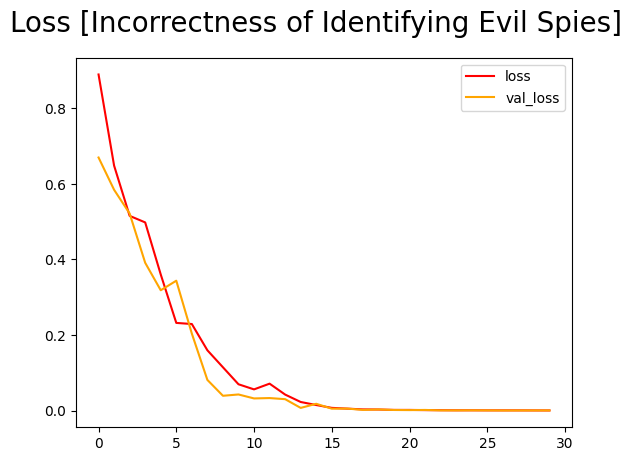

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss [Incorrectness of Identifying Evil Spies]', fontsize=20)
plt.legend(loc="upper right")
plt.show()

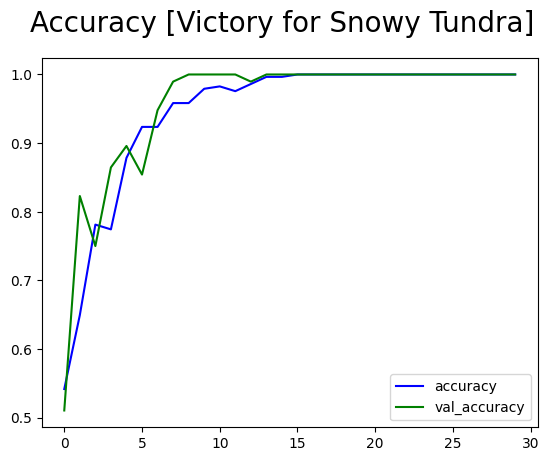

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
fig.suptitle('Accuracy [Victory for Snowy Tundra]', fontsize=20)
plt.legend(loc="lower right")
plt.show()


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 359ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


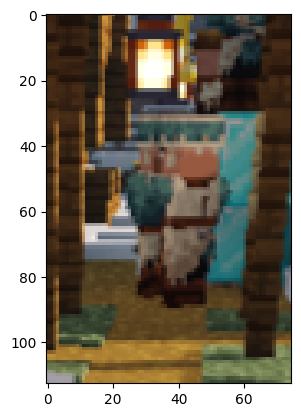

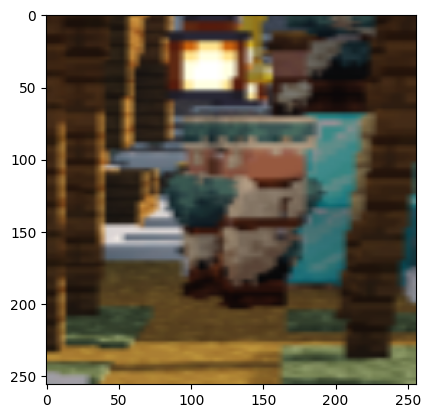

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/final project/test/snowtest.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 101ms/step


array([[0.99617946]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Class: good guy')
else:
    print(f'Class: evil spy')

Class: good guy


In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/final project/models','/content/drive/MyDrive/Colab Notebooks/final project/models/imageclassifier.h5'))
os.path.join('/content/drive/MyDrive/Colab Notebooks/final project/models','/content/drive/MyDrive/Colab Notebooks/final project/models/imageclassifier.h5')
new_model = load_model('/content/drive/MyDrive/Colab Notebooks/final project/models/imageclassifier.h5')
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 189ms/step


In [ ]:
if yhat_new > 0.5:
    print(f'Class: good guy')
else:
    print(f'Class: evil spy')

Class: good guy


NameError: name 'metrics' is not defined